<a href="https://colab.research.google.com/github/Onur-Caliskan/Deep-Learning/blob/main/Deep%20Learning%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/CMPE460/train'
val_dir = '/content/drive/MyDrive/CMPE460/val'
test_dir = '/content/drive/MyDrive/CMPE460/test'

In [4]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE=32
#Adjust photos in pixels

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    brightness_range = (1.2, 1.5),
    horizontal_flip = True
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)
#Scaled the sets (train set, validation set and test set)

In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)
val_data = train_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)
test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

#In this cell, we adjust the dimensions of the train set, validation set and test set in pixels and classify the photos as binary

Found 1035 images belonging to 2 classes.
Found 319 images belonging to 2 classes.
Found 776 images belonging to 2 classes.


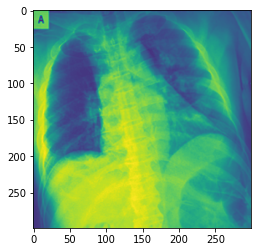

In [7]:
img = mpimg.imread('/content/drive/MyDrive/CMPE460/test/Covid/COVID-2.png')
imgplot = plt.imshow(img)
plt.show()

#Example photo of datasets

In [8]:
model = tf.keras.applications.MobileNetV2()
print(model)

14536120/14536120 [==============================] - 1s 0us/step


In [9]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
mobilenet.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [10]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
pretrained_model=mobilenet(inputs, training=False)
dense = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
model = tf.keras.Model(inputs, outputs)
print(model.summary())
#Inputs, outputs, dense and summary of all model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,570,753
Trainable params: 1,312,769
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [11]:
EPOCHS = 10

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
             'accuracy',
             tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(
                   monitor='val_loss',
                   patience=3,
                   restore_best_weights=True
               )
    ]
)

#AUC represents the decomposable measure or degree of parameters.

Epoch 1/10
33/33 [==============================] - 466s 14s/step - loss: 0.1676 - accuracy: 0.9353 - auc: 0.9835 - val_loss: 0.0578 - val_accuracy: 0.9843 - val_auc: 0.9958
Epoch 2/10
33/33 [==============================] - 40s 1s/step - loss: 0.0707 - accuracy: 0.9778 - auc: 0.9963 - val_loss: 0.0225 - val_accuracy: 0.9937 - val_auc: 1.0000
Epoch 3/10
33/33 [==============================] - 40s 1s/step - loss: 0.0582 - accuracy: 0.9739 - auc: 0.9979 - val_loss: 0.0338 - val_accuracy: 0.9937 - val_auc: 0.9963
Epoch 4/10
33/33 [==============================] - 38s 1s/step - loss: 0.0491 - accuracy: 0.9816 - auc: 0.9975 - val_loss: 0.0142 - val_accuracy: 0.9969 - val_auc: 0.9999
Epoch 5/10
33/33 [==============================] - 38s 1s/step - loss: 0.0314 - accuracy: 0.9874 - auc: 0.9994 - val_loss: 0.0767 - val_accuracy: 0.9687 - val_auc: 0.9978
Epoch 6/10
33/33 [==============================] - 38s 1s/step - loss: 0.0256 - accuracy: 0.9874 - auc: 0.9996 - val_loss: 0.0433 - val_a

In [12]:
true_labels = test_data.labels
pred_labels = np.squeeze(np.array(model.predict(test_data ) >= 0.5, dtype=np.int))

cm = confusion_matrix(true_labels, pred_labels)

25/25 [==============================] - 279s 12s/step


<ipython-input-12-5cbc56f3487c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_labels = np.squeeze(np.array(model.predict(test_data ) >= 0.5, dtype=np.int))


In [13]:
test_data.class_indices
#Covid and Pneumonia's binary values 0 & 1

{'Covid': 0, 'Pneumonia': 1}

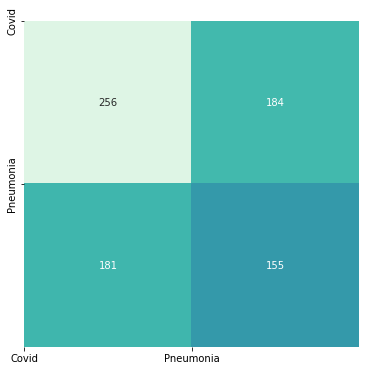

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
plt.xticks(range(2), ['Covid','Pneumonia'])
plt.yticks(range(2),['Covid','Pneumonia'])
plt.show()


In [15]:
results = model.evaluate(test_data, verbose=0)

accuracy = results[1]
auc = results[2]

In [16]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp+fp)
recall = tp / (tp+fn)

#Accuracy, precision and recall values

In [17]:
print("Accuracy: {:.2f}".format(accuracy))
print("AUC: {:.2f}".format(auc))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.99
AUC: 1.00
Precision: 0.46
Recall: 0.46


In [18]:
import cv2

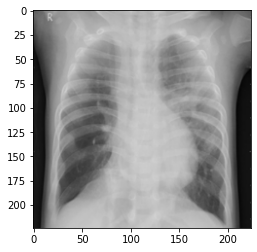

Viral Pneumonia-26.png


In [20]:
import random
path = 'drive/MyDrive/CMPE460/Random/'
file = random.choice(os.listdir("drive/MyDrive/CMPE460/Random/"))
capture = cv2.imread(os.path.join(path,file))


plt.imshow(capture)


resize = tf.image.resize(capture, (224,224))

plt.imshow(resize.numpy().astype(int))
plt.show()

print(file)

In [21]:
yhat = model.predict(np.expand_dims(resize/255, 0))



if yhat > 0.5: 
    print('Predicted class is Pnemonia')
else:
    print('Predicted class is Covid')

1/1 [==============================] - 1s 673ms/step
Predicted class is Pnemonia


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.5 [780 kB]
Fetched 780 kB in 1s (618 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 129501 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.5_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.5) ...
Processing triggers for man-db (2.9.1-1) ...
